In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 先看看几个数据的分布情况

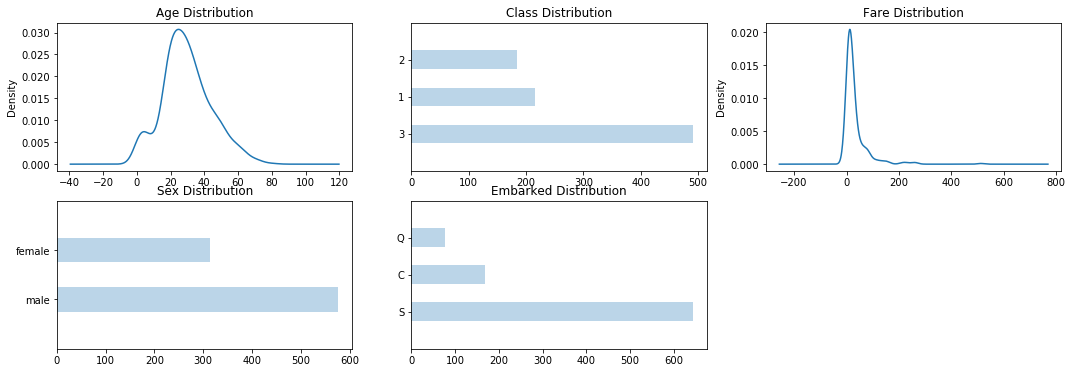

In [36]:
plt.figure(figsize=(18,6))

# age part
plt.subplot2grid((2,3),(0,0))
data.Age.plot(kind='kde')
plt.title("Age Distribution")

# pclass part
ax2 = plt.subplot2grid((2,3),(0,1))
data.Pclass.value_counts().plot(kind="barh", alpha=0.3)
ax2.set_ylim(-1, len(data.Pclass.value_counts()))
plt.title("Class Distribution")

# fare part
plt.subplot2grid((2,3),(0,2))
data.Fare.plot(kind='kde')
plt.title("Fare Distribution")

# sex part
ax3 = plt.subplot2grid((2,3),(1,0))
data.Sex.value_counts().plot(kind="barh", alpha=0.3)
ax3.set_ylim(-1, len(data.Sex.value_counts()))
plt.title("Sex Distribution")

# Embarked part
ax4 = plt.subplot2grid((2,3),(1,1))
data.Embarked.value_counts().plot(kind="barh", alpha=0.3)
ax4.set_ylim(-1, len(data.Embarked.value_counts()))
plt.title("Embarked Distribution")


plt.show()

### 一些数据间的相关性

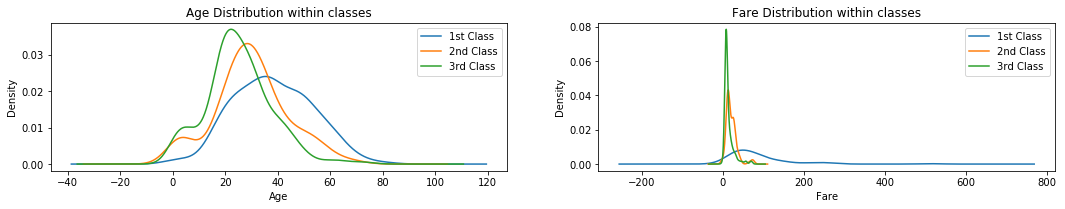

In [22]:
plt.figure(figsize=(18,6))

plt.subplot2grid((2,2),(1,0))
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

plt.subplot2grid((2,2),(1,1))
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.Fare[data.Pclass == 1].plot(kind='kde')    
data.Fare[data.Pclass == 2].plot(kind='kde')
data.Fare[data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Fare")    
plt.title("Fare Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 



plt.show()

### 看看某几项数据的存活概率情况

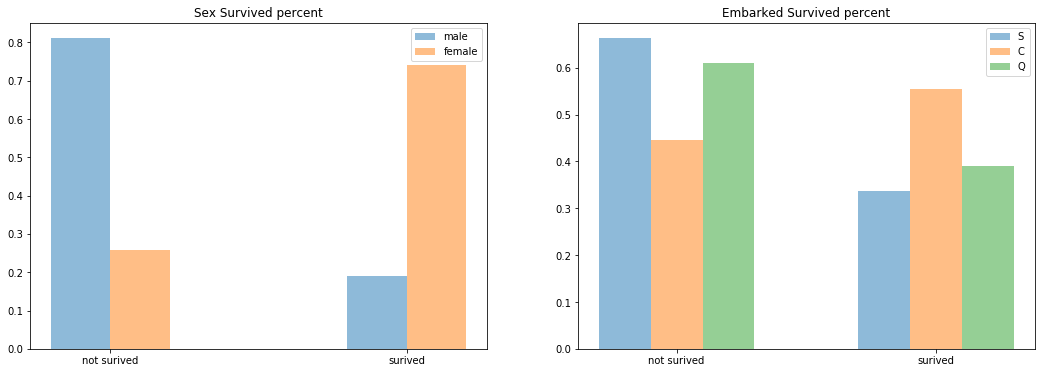

In [98]:
fig = plt.figure(figsize=(18,6))
width = 0.2
idx = np.arange(2)

df_male = data.Survived[data.Sex == 'male'].value_counts()
df_female = data.Survived[data.Sex == 'female'].value_counts()

fig.add_subplot(121)
plt.bar(idx, data.Survived[data.Sex == 'male'].value_counts().sort_index() / data.Survived[data.Sex == 'male'].size, width=width, label='male', alpha=0.5)
plt.bar(idx + width, data.Survived[data.Sex == 'female'].value_counts().sort_index() / data.Survived[data.Sex == 'female'].size, width=width, label='female', alpha=0.5)
plt.title("Sex Survived percent"); plt.legend(loc='best')
plt.xticks(idx + width / 2, ('not surived', 'surived'))

fig.add_subplot(122)
plt.bar(idx - width, data.Survived[data.Embarked == 'S'].value_counts().sort_index()/ data.Survived[data.Embarked == 'S'].size, width=width, label='S', alpha=0.5)
plt.bar(idx, data.Survived[data.Embarked == 'C'].value_counts().sort_index()/ data.Survived[data.Embarked == 'C'].size, width=width, label='C', alpha=0.5)
plt.bar(idx + width, data.Survived[data.Embarked == 'Q'].value_counts().sort_index()/ data.Survived[data.Embarked == 'Q'].size, width=width, label='Q', alpha=0.5)
plt.title("Embarked Survived percent"); plt.legend(loc='best')
plt.xticks(idx, ('not surived', 'surived'))

plt.show()

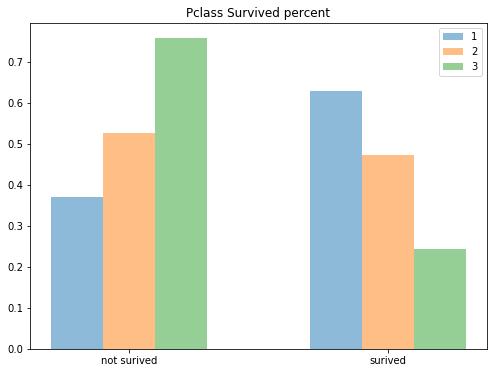

In [103]:
fig = plt.figure(figsize=(18,6))
width = 0.2
idx = np.arange(2)

fig.add_subplot(121)
plt.bar(idx - width, data.Survived[data.Pclass == 1].value_counts().sort_index()/ data.Survived[data.Pclass == 1].size, width=width, label='1', alpha=0.5)
plt.bar(idx, data.Survived[data.Pclass == 2].value_counts().sort_index()/ data.Survived[data.Pclass == 2].size, width=width, label='2', alpha=0.5)
plt.bar(idx + width, data.Survived[data.Pclass == 3].value_counts().sort_index()/ data.Survived[data.Pclass == 3].size, width=width, label='3', alpha=0.5)
plt.title("Pclass Survived percent"); plt.legend(loc='best')
plt.xticks(idx, ('not surived', 'surived'))

plt.show()